# About DataFrames

This notebook contains general information on Pandas dataframes and the basic commands that one can use with them

## Creating dataframes

### From a .csv file
In the following examples, I am going to use a .csv file named `backtesting.csv` from a FOREX project I've been working with and I am going to create a dataframe from it using Pandas `read_csv` method:

In [6]:
import pandas as pd
import numpy as np

%matplotlib inline

# read-in the data frame from csv file
DF=pd.read_csv('../DATA/backtesting.csv')

#read-in the data frame and set the columns data types at the same time
DF=pd.read_csv('../DATA/backtesting.csv',dtype={'RSI': np.float64, 'Number of bounces': np.int64})

Also, if the dataframe starts with a commented line we can skip it by doing:

In [73]:
DFtest1=pd.read_csv('../DATA/backtesting.csv',comment='#')

Now, if we want also to add some column names:

In [74]:
DFtest2=pd.read_csv('../DATA/backtesting.csv',comment='#',names=['colname1','colname2'])

read_csv allows also to read certain columns from the file

In [75]:
DFtest3=pd.read_csv("../DATA/backtesting.csv", usecols=[2]) # usecols works with 0-indexed columns

### Creating a dataframe from a dictionary

In [76]:
d = {'col1': [1, 2, 3], 'col2': [3, 4, 5]}
df = pd.DataFrame(data=d)

## Exploring the Dataframe

Good!, now we can inspect this new dataframe:  

In [77]:
# returns a tuple with number of rows/columns
DF.shape

(86, 11)

In order to have basic information the DataFrame:

In [78]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 11 columns):
End of trend                 86 non-null object
RSI                          86 non-null float64
Divergence                   86 non-null bool
Number of bounces            86 non-null int64
Trend length before(bars)    86 non-null int64
Currency Pair                86 non-null object
Direction                    86 non-null object
Entry Time-frame             86 non-null object
Reversed                     86 non-null bool
Trend length after (bars)    69 non-null float64
Ranging                      86 non-null bool
dtypes: bool(3), float64(2), int64(2), object(4)
memory usage: 5.7+ KB


And we can also take a look to the first rows of the dataframe:

In [79]:
DF.head(3) #only the 3 first lines are shown

,End of trend,RSI,Divergence,Number of bounces,Trend length before(bars),Currency Pair,Direction,Entry Time-frame,Reversed,Trend length after (bars),Ranging
0,23/04/2008 03:00,60.0,True,2,53,EUR/USD,up,D,True,132.0,False
1,06/05/2008 03:00,39.0,False,0,7,EUR/USD,down (within uptrend),D,False,NaN,False
2,27/05/2008 03:00,54.0,False,0,5,EUR/USD,up,D,True,6.0,True


In order to know whe column names:

In [80]:
DF.columns

Index(['End of trend', 'RSI', 'Divergence', 'Number of bounces',
       'Trend length before(bars)', 'Currency Pair', 'Direction',
       'Entry Time-frame', 'Reversed', 'Trend length after (bars)', 'Ranging'],
      dtype='object')

If we want to check a particular column from the dataframe ('RSI' for example):

In [81]:
RSI=DF[['RSI']]

If we want to select 2 non consecutive columns:

In [82]:
a=DF[['RSI','Ranging']]

### Selecting using .iloc and .loc
Extracted from:
https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/

#### .iloc<br>
Single selection:<br>
* Rows:<br>
data.iloc[0] # first row of data frame (Aleshia Tomkiewicz) - Note a Series data type output.<br>
data.iloc[1] # second row of data frame (Evan Zigomalas)<br>
data.iloc[-1] # last row of data frame (Mi Richan)<br>
* Columns:<br>
data.iloc[:,0] # first column of data frame (first_name)<br>
data.iloc[:,1] # second column of data frame (last_name)<br>
data.iloc[:,-1] # last column of data frame (id)<br>

Multiple selection:<br>
<br>
data.iloc[0:5] # first five rows of dataframe<br>
data.iloc[:, 0:2] # first two columns of data frame with all rows<br>
data.iloc[[0,3,6,24], [0,5,6]] # 1st, 4th, 7th, 25th row + 1st 6th 7th columns.<br>
data.iloc[0:5, 5:8] # first 5 rows and 5th, 6th, 7th columns of data frame (county -> phone1)<br>

#### .loc<br>
Single selection:<br>
a=DF.loc[:,'Direction']<br>

Multiple selection:<br>
a=DF.loc[:,['Direction','RSI']]

### Objects returned by .iloc and .loc

* If only one row is selected then we will get a Pandas series:<br>
data.iloc[0]
* If we use list selector then we get a Dataframe:<br>
data.iloc[[0]]
* If we select multiple rows then we get a Dataframe:<br>
data.iloc[0:5]

In [83]:
ix='RSI'

DF.loc[:,ix]

0     60.0
1     39.0
2     54.0
3     42.0
4     43.0
5     61.0
6     20.6
7     17.0
8     58.0
9     20.6
10    77.0
11    41.0
12    72.0
13    42.0
14    72.0
15    48.0
16    52.0
17    47.0
18    64.0
19    72.0
20    62.0
21    26.0
22    50.0
23    27.0
24    23.0
25    30.0
26    71.0
27    72.0
28    66.0
29    27.0
      ... 
56    32.0
57    57.0
58    38.0
59    73.0
60    25.0
61    68.0
62    40.0
63    59.0
64    39.0
65    29.0
66    28.0
67    59.0
68    24.0
69    57.0
70    43.0
71    54.0
72    51.0
73    28.0
74    41.0
75    26.0
76    28.0
77    39.0
78    30.0
79    39.0
80    49.0
81    20.0
82    45.0
83    27.0
84    32.0
85    31.0
Name: RSI, Length: 86, dtype: float64

### Logical selection

And for example, if we want to select all records for which the 'Reversed' column is TRUE:

In [84]:
reversed_true=DF.loc[DF['Reversed']==True]

And if we want to select based in either the value of one column or a different one:

In [85]:
DF.loc[(DF['Reversed']==True) | DF['Divergence']==True]

,End of trend,RSI,Divergence,Number of bounces,Trend length before(bars),Currency Pair,Direction,Entry Time-frame,Reversed,Trend length after (bars),Ranging
0,23/04/2008 03:00,60.0,True,2,53,EUR/USD,up,D,True,132.0,False
2,27/05/2008 03:00,54.0,False,0,5,EUR/USD,up,D,True,6.0,True
4,16/06/2008 03:00,43.0,False,0,4,EUR/USD,down,D,True,20.0,True
5,15/07/2008 03:00,61.0,False,0,20,EUR/USD,up,D,True,41.0,True
7,12/9/2008 03:00,17.0,False,2,43,EUR/USD,down,D,True,8.0,False
8,23/9/2008 03:00,58.0,False,0,6,EUR/USD,up (within downtrend),D,True,24.0,False
9,28/10/2008 03:00,20.6,True,5,70,EUR/USD,down,D,True,36.0,False
10,19/12/2008 03:00,77.0,False,0,13,EUR/USD,up,D,True,42.0,False
11,05/03/2009 03:00,41.0,True,0,56,EUR/USD,down,D,True,189.0,False
12,20/03/2009 03:00,72.0,False,0,11,EUR/USD,up,D,True,20.0,False


Now, if we want the counts (frequencies) for a certain categorical variable we have to enter the following:

In [86]:
DF['Currency Pair'].value_counts()

EUR/USD    73
USD/CAD    11
AUD/USD     2
Name: Currency Pair, dtype: int64

Now, if we want to copy the entire dataframe:

In [87]:
newDF = DF.copy()

newDF.head(3)

,End of trend,RSI,Divergence,Number of bounces,Trend length before(bars),Currency Pair,Direction,Entry Time-frame,Reversed,Trend length after (bars),Ranging
0,23/04/2008 03:00,60.0,True,2,53,EUR/USD,up,D,True,132.0,False
1,06/05/2008 03:00,39.0,False,0,7,EUR/USD,down (within uptrend),D,False,NaN,False
2,27/05/2008 03:00,54.0,False,0,5,EUR/USD,up,D,True,6.0,True


## Operations on the entire Dataframe

### Renaming the columns of the dataframe

In [88]:
newDF.columns=['newEnd of trend', 'RSI', 'Divergence', 'Number of bounces',
               'Trend length before(bars)', 'Currency Pair', 'Direction',
               'Entry Time-frame', 'Reversed', 'Trend length after (bars)', 'Ranging']

#### Renaming a certain column

In [89]:
DFren=DF.rename(columns={'RSI': 'RSINEW'})

### Adding a column to the dataframe

In [7]:
df = pd.DataFrame({'B': [1, 2, 3], 'C': [4, 5, 6]})
print(df)

   B  C
0  1  4
1  2  5
2  3  6


We are adding the column into the first position of the dataframe

In [ ]:
idx = 0
new_col = [7, 8, 9]  # can be a list, a Series, an array or a scalar   
df.insert(loc=idx, column='A', value=new_col)

### Rounding all values in dataframe

In [90]:
DFrounded=DF.round(decimals=2)

### Combine 2 dataframes

In [1]:
In [1]: df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
   ...:                     'B': ['B0', 'B1', 'B2', 'B3'],
   ...:                     'C': ['C0', 'C1', 'C2', 'C3'],
   ...:                     'D': ['D0', 'D1', 'D2', 'D3']},
   ...:                     index=[0, 1, 2, 3])
   ...: 

In [2]: df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
   ...:                     'B': ['B4', 'B5', 'B6', 'B7'],
   ...:                     'C': ['C4', 'C5', 'C6', 'C7'],
   ...:                     'D': ['D4', 'D5', 'D6', 'D7']},
   ...:                      index=[4, 5, 6, 7])
   ...: 

In [3]: df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
   ...:                     'B': ['B8', 'B9', 'B10', 'B11'],
   ...:                     'C': ['C8', 'C9', 'C10', 'C11'],
   ...:                     'D': ['D8', 'D9', 'D10', 'D11']},
   ...:                     index=[8, 9, 10, 11])
   ...: 

In [4]: frames = [df1, df2, df3]

In [5]: result = pd.concat(frames)

NameError: name 'pd' is not defined

## Operations on the different variables in the Dataframe

### pd.crosstab

The crosstab function can be used with the dataframe in order to create contigency tables to analyze the relationship between categorical variables. 
For example, let's analyze if there is a relationship between the probability of having a price reversal (`Reversed`= True) if there is divergence in the RSI indicator (`Divergence`=True):

In [91]:
div_class=pd.crosstab(DF['Divergence'], DF['Reversed'],margins=True)

print(div_class)

Reversed    False  True  All
Divergence                  
False          16    48   64
True            3    19   22
All            19    67   86


The 2x2 contigency table thas is above shows counts (including the Total row/columns counts. Now, if we want to calculate the proportion along each column:

In [92]:
div_class/div_class.loc["All"]

Reversed,False,True,All
Divergence,,,
False,0.842105,0.716418,0.744186
True,0.157895,0.283582,0.255814
All,1.000000,1.000000,1.000000


### pd.groupby

This Pandas function is used to split the data depending on the categories of a certain variable. Then, a certain operation can be applied to the subgroups created after splitting the data and finally the different subgroups are combined into the final dataframe

Let's see an example:

In [93]:
DF.groupby(['Divergence']).agg({'Trend length after (bars)': 'mean'})

,Trend length after (bars)
Divergence,
False,26.340000
True,97.947368


We split the dataframe into 2 subgroups depending on the values of the `Divergence` variable (TRUE/FALSE). And then, we calculate the mean for the variable `Trend length after (bars)` for each subgroup

Now, let's calculate the normalized value_counts for each category

In [94]:
grouped=DF.groupby(['Divergence'])
grouped['Currency Pair'].value_counts(normalize=True)

Divergence  Currency Pair
False       EUR/USD          0.859375
            USD/CAD          0.140625
True        EUR/USD          0.818182
            AUD/USD          0.090909
            USD/CAD          0.090909
Name: Currency Pair, dtype: float64

### pd.cut

This Pandas function can be used to create bins based on the values of a continuous variable. In this way, we create discrete chunks that are used as ordinal categorical variables. For example:

In [95]:
pd.cut(np.array([.2, 1.4, 2.5, 6.2, 9.7, 2.1]), 3, retbins=True)


([(0.19, 3.367], (0.19, 3.367], (0.19, 3.367], (3.367, 6.533], (6.533, 9.7], (0.19, 3.367]]
 Categories (3, interval[float64]): [(0.19, 3.367] < (3.367, 6.533] < (6.533, 9.7]],
 array([ 0.1905    ,  3.36666667,  6.53333333,  9.7       ]))

And if we want to create our own cut points we need to use a numpy array:

In [96]:
cuts = np.array([0,2,4,6,10])
pd.cut(np.array([.2, 1.4, 2.5, 6.2, 9.7, 2.1]), cuts)

[(0, 2], (0, 2], (2, 4], (6, 10], (6, 10], (2, 4]]
Categories (4, interval[int64]): [(0, 2] < (2, 4] < (4, 6] < (6, 10]]

### drop function
This is used to drop a column from the dataframe. The original DF is not affected by this drop

In [97]:
newDF=DF.drop("RSI",axis=1)

### copy function
This function can be used in order to create a copy of a certain column in the DataFrame:

In [98]:
rsi_values=DF["RSI"].copy()

Now, let's duplicate a certain column in the DF (in this case we are adding a new column with these duplicated values)

In [99]:
DF.assign(RSI_copy = lambda x: x.RSI)

,End of trend,RSI,Divergence,Number of bounces,Trend length before(bars),Currency Pair,Direction,Entry Time-frame,Reversed,Trend length after (bars),Ranging,RSI_copy
0,23/04/2008 03:00,60.0,True,2,53,EUR/USD,up,D,True,132.0,False,60.0
1,06/05/2008 03:00,39.0,False,0,7,EUR/USD,down (within uptrend),D,False,NaN,False,39.0
2,27/05/2008 03:00,54.0,False,0,5,EUR/USD,up,D,True,6.0,True,54.0
3,05/06/2008 03:00,42.0,False,0,6,EUR/USD,down,D,False,NaN,True,42.0
4,16/06/2008 03:00,43.0,False,0,4,EUR/USD,down,D,True,20.0,True,43.0
5,15/07/2008 03:00,61.0,False,0,20,EUR/USD,up,D,True,41.0,True,61.0
6,13/08/2008 03:00,20.6,False,0,17,EUR/USD,down,D,False,NaN,False,20.6
7,12/9/2008 03:00,17.0,False,2,43,EUR/USD,down,D,True,8.0,False,17.0
8,23/9/2008 03:00,58.0,False,0,6,EUR/USD,up (within downtrend),D,True,24.0,False,58.0
9,28/10/2008 03:00,20.6,True,5,70,EUR/USD,down,D,True,36.0,False,20.6


Now, if we want to create a new variable with the RSI values divided by two:

In [100]:
a=DF.assign(RSI_half = lambda x: x.RSI/2)

### filling the na (or n.a. or missing values)

First thing that is interesting is to check what columns have NaN values:

In [2]:
DF.isna().any()

NameError: name 'DF' is not defined

And in order deal with NaN values
There are different strategies for this:
* Dropping the na values for each of the missing rows:

In [101]:
#In this case, we are dropping the na values from RSI
DF.dropna(subset=["RSI"])

,End of trend,RSI,Divergence,Number of bounces,Trend length before(bars),Currency Pair,Direction,Entry Time-frame,Reversed,Trend length after (bars),Ranging
0,23/04/2008 03:00,60.0,True,2,53,EUR/USD,up,D,True,132.0,False
1,06/05/2008 03:00,39.0,False,0,7,EUR/USD,down (within uptrend),D,False,NaN,False
2,27/05/2008 03:00,54.0,False,0,5,EUR/USD,up,D,True,6.0,True
3,05/06/2008 03:00,42.0,False,0,6,EUR/USD,down,D,False,NaN,True
4,16/06/2008 03:00,43.0,False,0,4,EUR/USD,down,D,True,20.0,True
5,15/07/2008 03:00,61.0,False,0,20,EUR/USD,up,D,True,41.0,True
6,13/08/2008 03:00,20.6,False,0,17,EUR/USD,down,D,False,NaN,False
7,12/9/2008 03:00,17.0,False,2,43,EUR/USD,down,D,True,8.0,False
8,23/9/2008 03:00,58.0,False,0,6,EUR/USD,up (within downtrend),D,True,24.0,False
9,28/10/2008 03:00,20.6,True,5,70,EUR/USD,down,D,True,36.0,False


* Replacing the missing values with the median:

In [102]:
median = DF["RSI"].median()  # option 3
DF["RSI"].fillna(median, inplace=True)

* Selecting the null values in a dataframe column

In [103]:
df = pd.DataFrame([[1, 2, 3], [3, 4, None]]) #creating a df with a null value for column 2
df[df[2].isnull()]

,0,1,2
1,3,4,NaN


* Selecting the not null values in a dataframe column

In [104]:
df[df[2].notnull()]

,0,1,2
0,1,2,3.0


### Changing the date type of an entire column
Example extracted from https://code.i-harness.com/en/q/f27a5e

In [105]:
a = [['a', '1.2', '4.2'], ['b', '70', '0.03'], ['x', '5', '0']]
df = pd.DataFrame(a, columns=['one', 'two', 'three'])

df.dtypes

one      object
two      object
three    object
dtype: object

In [106]:
df[['two', 'three']] = df[['two', 'three']].astype(float)

df.dtypes

one       object
two      float64
three    float64
dtype: object

### Working with dates
We illustrate here how to work with dates. First, let's convert a date string element in the `End of trend` column into a datetime object: 

In [107]:
adate_str=DF['End of trend'][0]

adate=pd.datetime.strptime(adate_str, '%d/%m/%Y %H:%M')

Now, we can perform arithmetic operations with this date. For example, we can substract a day:

In [108]:
D=pd.DateOffset(1)

adate_minus1=adate-D

Now, we can convert back this date object into a string:

In [109]:
adate_minus1.strftime('%d/%m/%Y %H:%M')

'22/04/2008 03:00'

Now, let's work on the entire column. Let's replace the data type of the `End of trend` column to datetime object:

In [110]:
DF['End of trend'] = pd.to_datetime(DF['End of trend'])

### Deleting rows based on the value of one column
Let's imagine that we want to remove from the dataframe all records where the value of 'Divergence' is True. This can be done in the following way:

In [111]:
DF = DF[DF.Divergence != True]

## Applying functions on a dataframe

### Apply function on a certain column

* Using a lambda function

In [112]:
d = {'col1': [1, 2, 3], 'col2': [3, 4, 5]}
df = pd.DataFrame(data=d)

df['col1'] = df['col1'].apply(lambda x: x + 1)
print(df)

   col1  col2
0     2     3
1     3     4
2     4     5


* Conditional logic on a dataframe

In [113]:
df["logic"] = df["col1"] > 3
print(df)

   col1  col2  logic
0     2     3  False
1     3     4  False
2     4     5   True


* Applying a created function on a dataframe

In [114]:
# create a function called times100
def times100(x):
    # that, if x is a string,
    if type(x) is str:
        # just returns it untouched
        return x
    # but, if not, return it multiplied by 100
    elif x:
        return 100 * x
    # and leave everything else
    else:
        return
    
df.applymap(times100)

,col1,col2,logic
0,200,300,NaN
1,300,400,NaN
2,400,500,100.0


Now, apply the times100 function on a single column

In [115]:
df['col1'].apply(times100)

0    200
1    300
2    400
Name: col1, dtype: int64

* Apply a function to every row in a dataframe

In [129]:
# Create a dataframe from a list of dictionaries
rectangles = [
    { 'height': 40, 'width': 10 },
    { 'height': 20, 'width': 9 },
    { 'height': 3.4, 'width': 4 }
]

rectangles_df = pd.DataFrame(rectangles)

In [130]:
# Use the height and width to calculate the area
def calculate_area(row):
    return row['height'] * row['width']

rectangles_df.apply(calculate_area, axis=1)

0    400.0
1    180.0
2     13.6
dtype: float64

## Plots in a dataframe

### Hist on a certain column

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1165cc4a8>]], dtype=object)

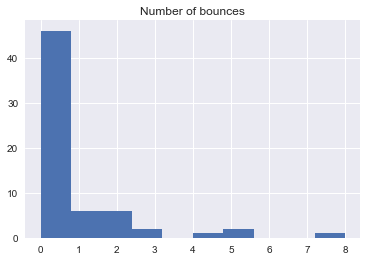

In [116]:
DF.hist(column='Number of bounces')

* Now, if we want to modify the axes, we need to access the list returned by the `hist` method

(0, 5)

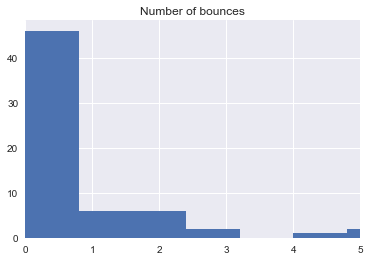

In [117]:
axList=DF.hist(column='Number of bounces')
axList[0][0].set_xlim((0,5))

* Now, if we want to modify the figure size

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11670eac8>]], dtype=object)

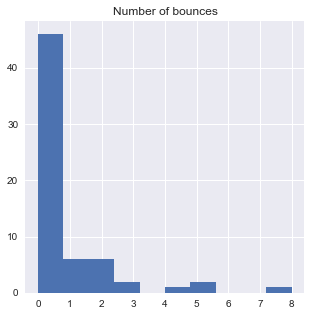

In [118]:
DF.hist(column='Number of bounces',figsize=(5,5))

### Hists based on the categories of a certain categorical variable

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116824518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x113f6e7f0>]], dtype=object)

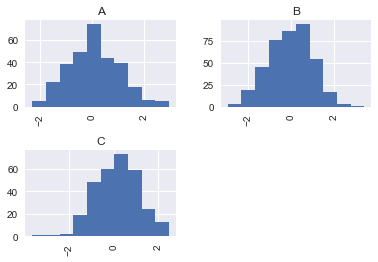

In [119]:
#creating the dataframe
x = ['A']*300 + ['B']*400 + ['C']*300
y = np.random.randn(1000)
df = pd.DataFrame({'Letter':x, 'N':y})
#plotting
df['N'].hist(by=df['Letter'])

* Now, if we want to modify the axes, we need to access the list returned by the `hist` method

(0, 5)

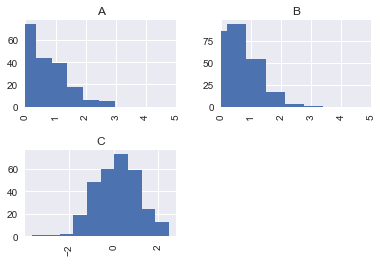

In [120]:
axList=df['N'].hist(by=df['Letter'])
axList[0][0].set_xlim((0,5))
axList[0][1].set_xlim((0,5))

### Creating a bar plot

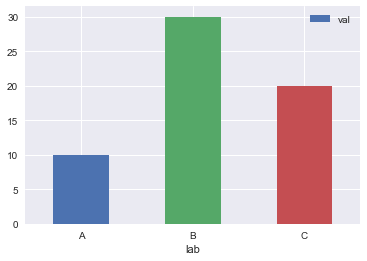

In [121]:
df = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})
ax = df.plot.bar(x='lab', y='val', rot=0)

* Now, we can plot several numerical series grouped by categories

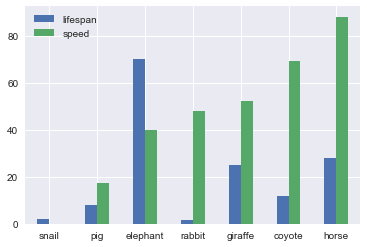

In [122]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)
ax = df.plot.bar(rot=0)

The figure can be split by column with subplots=True.

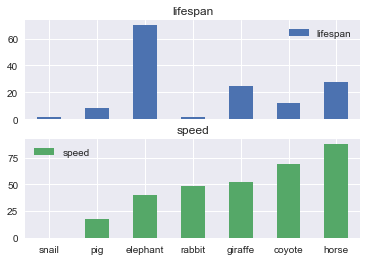

In [123]:
axes = df.plot.bar(rot=0, subplots=True)
axes[1].legend(loc=2)

### Creating barplot with seaborn
* Here we show how to create a countplot on a certain categorical variable

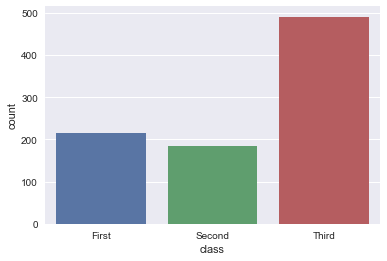

In [124]:
import seaborn as sns
sns.set(style="darkgrid")
titanic = sns.load_dataset("titanic")
titanic.head(5)
ax = sns.countplot(x="class", data=titanic)

* Countplot for two categorical variables

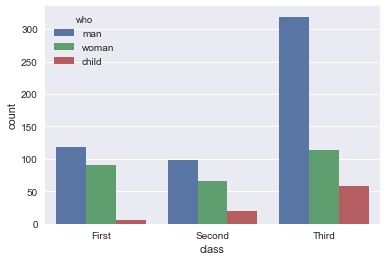

In [125]:
ax = sns.countplot(x="class", hue="who", data=titanic)

Now, let's create the barplot with the percentages

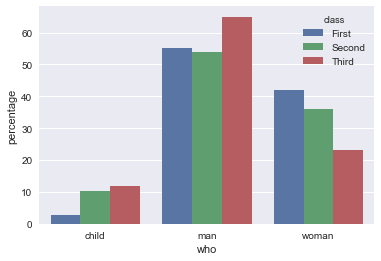

In [126]:
titanic_counts = (titanic.groupby(['class'])['who']
                  .value_counts(normalize=True)
                  .rename('percentage')
                  .mul(100)
                  .reset_index()
                  .sort_values('who'))
p = sns.barplot(x="who", y="percentage", hue="class", data=titanic_counts)

### Creating scatter plots to see the correlation between numerical variables

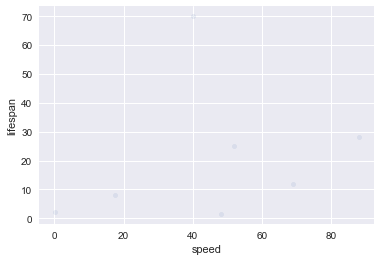

In [127]:
df.plot(kind="scatter", x="speed", y="lifespan", alpha=0.1)

* Now, let's create a scatter plot matrix:

from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

## Saving a dataframe
Saving a dataframe in .tsv format:

In [128]:
DF.to_csv('newDF.tsv',sep='\t')